## Proportional Control

If you wanted to build a robot that could follow a wall using an ultrasonic sensor, you might code it to use proportional control. This type of control algorithm uses a reading from your sensor, and a setpoint (or target distance) and reacts *proportionally* to the error between your reading and target. 

The algorithmic flow of proportional control is best described by this image: 

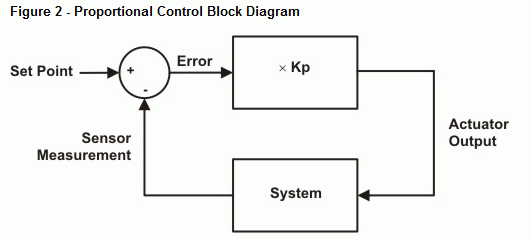

If this confuses you, that's ok. You will no doubt understand it by the end of this project!

Run the initialization script below to get started. 

In [ ]:
'''----------------------------------------------------------'''
'''Run this before anything else!!!'''
'''----------------------------------------------------------'''

##IMPORTS##
from easygopigo3 import EasyGoPiGo3
from EDL_Jupyter_resources import HiddenPrints
from IPython.display import clear_output
import time
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
hiddenprints=HiddenPrints()

# Initialize easy gpg
my_easy_robot = EasyGoPiGo3()
# Make sure that all sensors and output devices are uncofigured to start
my_easy_robot.reset_all()

###SENSORS###
my_distance_sensor=my_easy_robot.init_distance_sensor()

###INITIALIZING VARIABLES & CONSTANTS###
sample_rate=60 #samples/sec for US sensor
target=20 #drive to 20cm
length=20 #max length of loop is 20 seconds

def telemetry_report(telemetry,target,sample_rate):
    '''This function makes pretty graphs that 
    you can use to visually analyze your data'''
    
    if len(telemetry[0])>2: #graph P signal or no?
        P_exist=True
    else:
        P_exist=False
        
    pos=[] #data lists
    err=[]
    parry=[]
    x=[]
    for i in range(len(telemetry)): #populate lists
        #position and error data
        pos.append(telemetry[i][0])
        err.append(telemetry[i][1])
        if P_exist:
            #PID data
            parry.append(telemetry[i][2])
        #x-axis
        x.append(i/sample_rate) #x value is time

    target_array=np.empty(len(x)) #for making the target line
    target_array.fill(target)

    plt.figure(0)
    plt.title('Position vs Time & Target Line')
    plt.plot(x,pos) #plot pos vs time
    plt.plot(x,target_array) #plot the target line
    plt.figure(1)
    if P_exist:
        plt.title('Error / P Signal vs Time')
        plt.plot(x,err) #plot the error vs time
        plt.plot(x,parry) #plot pid stats vs time
    else:
        plt.title('Error vs Time')
        plt.plot(x,err) #plot the error vs time
    plt.show()

print('Initialized.')

### Basic example

To show the power of proportional control, lets try to code a script that makes GoPiGo drive at full speed towards a wall until it reads that it is 20 cm away, at which point it should stop immidiately.

Put your GoPiGo more than 20cm away from a wall, with the distance sensor mounted to the front. Finish and run the code below and look at the resulting graphs. 



In [ ]:
#Proportional Control Drive to Wall & Stop No P Exercise

###DATA ARRAYS###
raw_data=np.array([]) #this will be our running list of distance data
telemetry=[] #telemetry

'''----------------------------------------------------------'''
max_speed=100 #Can be anywhere between 0 and 1000
'''----------------------------------------------------------'''

###PRE LOOP TASKS###
my_easy_robot.stop()  #stop the car if its running
my_easy_robot.set_speed(max_speed) #Here we set the speed. 

###LOOP###
my_easy_robot.forward() #begin to drive forward
start=time.time() #start the clock 
while time.time()-start<length: #run
    
    reading=my_distance_sensor.read() #this is our reading
    raw_data=np.append(raw_data,reading) #this is our data set
    
    '''----------------------------------------------------------'''
    '''
    In the space below:
    
    -Create a variable called error, that is the current reading minus the target distance.
    -If abs(error) is less than one, break out of the loop.
    
    '''
    error = #define error here
    
    telemetry.append([reading,error]) #Don't change this
    
    if( ): #write your if statement here if abs(error) less than one
        #break here
    '''----------------------------------------------------------'''
    
    time.sleep(1/sample_rate)

print('Loop has finished. Stopping Car.')
print('Final error was %d'%error)
    
my_easy_robot.stop() #stop the car

telemetry_report(telemetry,target,sample_rate)

### Improving our final error

After looking at the output of the code above, why do you think your final error might not have been zero? Lower the max_speed variable under the constants section of the code. Does this improve your final error? What value of max_speed gives you no error at the end?

It's great to be accurate, but by improving your final error, you probably reduced max_speed down to a relatively low value. What if the GoPiGo could drive at 1000 speed when it was far away from 20cm, but slow down as it got closer to 20cm? This is the concept behind proportional control. 

### Slowing down as we get close: Proportional Control

To make our speed change as we get closer, we will adjust our percent of maximum speed using the ```my_easy_robot.steer(left_percent,right_percent)``` function, where ```left_percent``` & ```right_percent``` are percent values between -100 and 100. If we have max_speed 1000, and we run my_easy_robot.steer(50,50), we will actually drive at speed 500. 

Now, we just need to adjust our steering percentage by a proportion of how close we are, or, our *error*. Write a function called ```proportional_control()``` that takes in a constant integer called ```kp``` and an ```error``` value, and returns ```signal```, where 
```
signal=kp*error
```

In the main loop, steer the GoPiGo using ```proportional_control(kp, error)``` of the error. 


In [ ]:
#Proportional Control Drive to Wall Exercise

###INITIALIZING VARIABLES###
raw_data=np.array([]) #this will be our running list of distance data
telemetry=[] #debugging

'''----------------------------------------------------------'''
max_speed=1000 #maximum speed of motors 
kp=2 #Can be anything you want. This is percent speed reaction to 1 cm of error. 
'''----------------------------------------------------------'''

###PRE LOOP TASKS###
my_easy_robot.stop()  #stop the car if its running
my_easy_robot.set_speed(max_speed) #Here we set the speed. 

##FUNCTIONS##
'''----------------------------------------------------------'''
''' Define your function proportional_control here'''

def proportional_control(  ,  ): #put your arguments kp, error in the parentheses
    # define signal and return it inside of the function

'''----------------------------------------------------------'''

###LOOP###
start=time.time() #start the clock 
while time.time()-start<length: #run

    reading=my_distance_sensor.read()
    raw_data=np.append(raw_data,reading)
    
    '''----------------------------------------------------------'''
    '''
    In the space below:
    
    -Define error as you did in the previous section
    -Save a variable signal as the result of proportional_control(kp, error)
    -Use my_easy_robot.steer(left_percent,right_percent) to steer the robot using the control variable signal
    -When abs(error) is less than one, just like last time, stop the robot. 
    
    '''
    error = #define error here
    
    #save variable signal as the result of proportional_control(kp,error) here
    signal = 
    
    left_percent = #left_percent and right_percent should be defined in terms of signal
    right_percent = #left_percent and right_percent should be defined in terms of signal
    
    #Robot will be steered by left_percent, right_percent here
    my_easy_robot.steer(left_percent,right_percent)
    
    telemetry.append([reading,error,signal]) #Don't change this
    
    if( ): #write your if statement here if abs(error) less than one
        #break here
        
    '''----------------------------------------------------------'''
    
    time.sleep(1/sample_rate)
    

print('Loop has finished. Stopping Car.')
print('Final error was %d'%error)
    
my_easy_robot.stop() #stop the car

telemetry_report(telemetry,target,sample_rate)

Look at the resulting graphs. Did you get an error of zero? If not, try lowering kp to slow down the car more as you approach an error of zero. You should notice the GoPiGo slow down as it gets close to 20cm. 

Notice how the error graph includes a new line, called P Signal. This is the percent value that is being sent to the motors (if it is > 100, GPG just sets it back to 100). It should change proportionally based on the error signal, with a ratio of kp. As the error gets close to zero, the P Signal also gets smaller, slowing the GPG down. This is proportional control.

### Left-hand wall following using proportional control

If we place the distance sensor on the left side of the robot, and place the robot perpendicular to a wall, we should be able to follow the wall by reading the distance from the wall, and steering proportionally based on our error. 

Adjust the code below so that when the error gets larger (signal is getting bigger), it steers left. You can do this by subtracting and adding ```signal``` from 50 and setting that equal to ```left_percent``` and ```right_percent``` Think about which motor needs to drive faster in order to steer left. 

Also, change ```target``` to be:

```
target=my_distance_sensor.read()
```

so that the robot just follows the wall, instead of trying to get closer or farther away from it. It should run for 20 seconds by default, and the default speed is reduced. 

Can you get your robot to follow a wall? Interpret your telemetry graphs and change kp until it does it successfully. 

In [ ]:
#Proportional Control Wall Following Exercise

###INITIALIZING VARIABLES###
raw_data=np.array([]) #this will be our running list of distance data
telemetry=[] #debugging

###CONSTANTS###
max_speed=300

'''----------------------------------------------------------'''
'''
    In the space below:
    
        -Add your own value for kp
        -Update target to be my_distance_sensor.read()
'''
kp=5 #Can be anything you want. This is percent speed reaction to 1 cm of error. 

#Update target here to be the first distance reading!
target= 
'''----------------------------------------------------------'''

###PRE LOOP TASKS###
my_easy_robot.stop()  #stop the car if its running
my_easy_robot.set_speed(max_speed) #Here we set the speed. 

##FUNCTIONS##
'''----------------------------------------------------------'''
''' Paste your function proportional_control here'''


'''----------------------------------------------------------'''

###LOOP###
start=time.time() #start the clock 
while time.time()-start<length: #run

    reading=my_distance_sensor.read()
    raw_data=np.append(raw_data,reading)
    
    '''----------------------------------------------------------'''
    '''
    In the space below:
    
    -Define error as you did in the previous section
    -Save a variable signal as the result of proportional_control(kp, error)
    -Set left_percent and right_percent to be a default speed of 50 + or - P depending on how a robot should turn left
    
    '''
    error = #define error here
    
    #save variable signal as the result of proportional_control(kp,error) here
    signal = 
    
    left_percent = 50 # - / + P     #### add or subtract signal from 50 depending on which side of the wall you are following
    right_percent = 50 # + / - P     #### you should do the opposite that you did above for right percent
    
    #Robot will be steered by left_percent, right_percent here
    my_easy_robot.steer(left_percent,right_percent)
        
    '''----------------------------------------------------------'''
    
    telemetry.append([reading,error,signal]) #Don't change this
    
    time.sleep(1/sample_rate)
    

print('Loop has finished. Stopping Car.')
    
my_easy_robot.stop() #stop the car

telemetry_report(telemetry,target,sample_rate)

What objects/features can your robot follow successfully? What features does it perform worse on? Try a few features like this:

- Corner of a wall
- Protruding feature (like a fridge)
- Round feature
- Moving feature (like opening a door while the robot follows it)


In [ ]:
#EMERGENCY STOP
from easygopigo3 import EasyGoPiGo3
# Initialize easy gpg
my_easy_robot = EasyGoPiGo3()
# Make sure that all sensors and output devices are uncofigured to start
my_easy_robot.reset_all()
my_easy_robot.stop()